# Project Country Data

## Importing neccesry libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import FastICA as ICA
from scipy.cluster.hierarchy import dendrogram, linkage as hc_linkage
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.metrics import silhouette_score as sscore, calinski_harabasz_score as chscore, davies_bouldin_score as dbscore
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [41]:
country_df = pd.read_csv("https://raw.githubusercontent.com/Shalin06/dataset/main/Country-data.csv?token=GHSAT0AAAAAACACUW6MZYH7UPTTOUHOE5AGZBAATFA")
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Preprocessing

In [42]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [43]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [44]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Scalling the data 

In [45]:
X = country_df.copy()
Y = X["country"]
X = X.drop("country" ,axis = 1)
X_scale = StandardScaler().fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns = X.columns)
X_scale

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


## Vizualizing the data

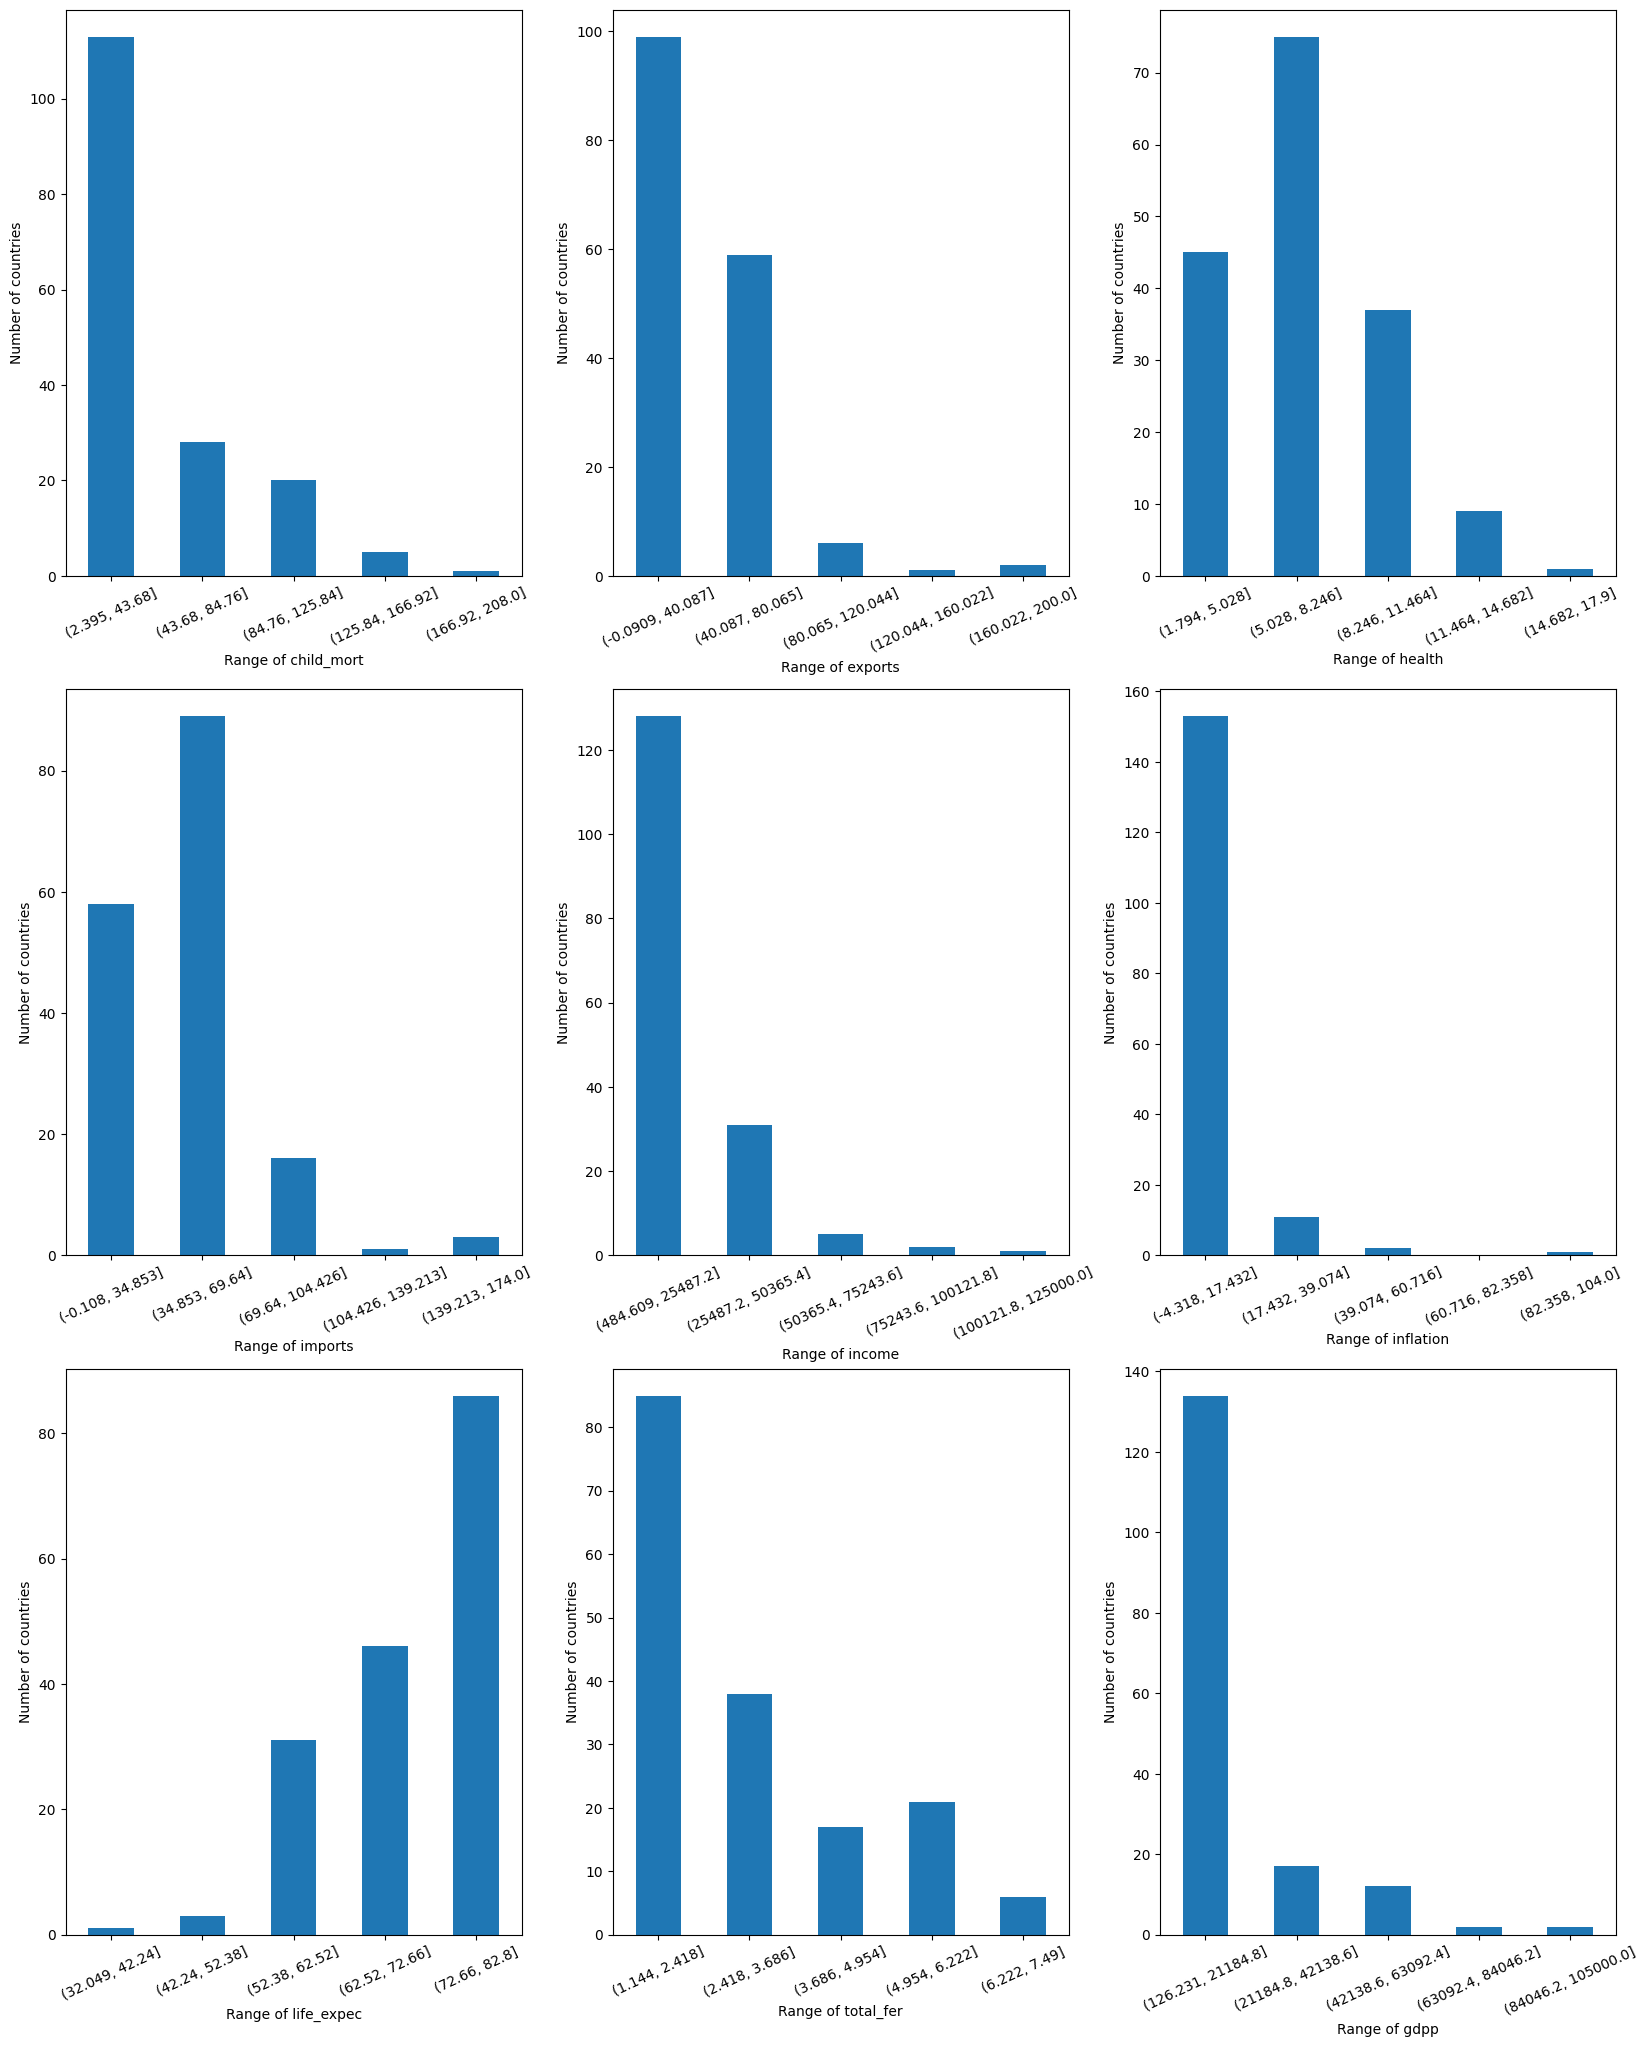

In [46]:
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X.columns:
    temp = pd.cut(x = country_df[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

## Vizualize the scaled data

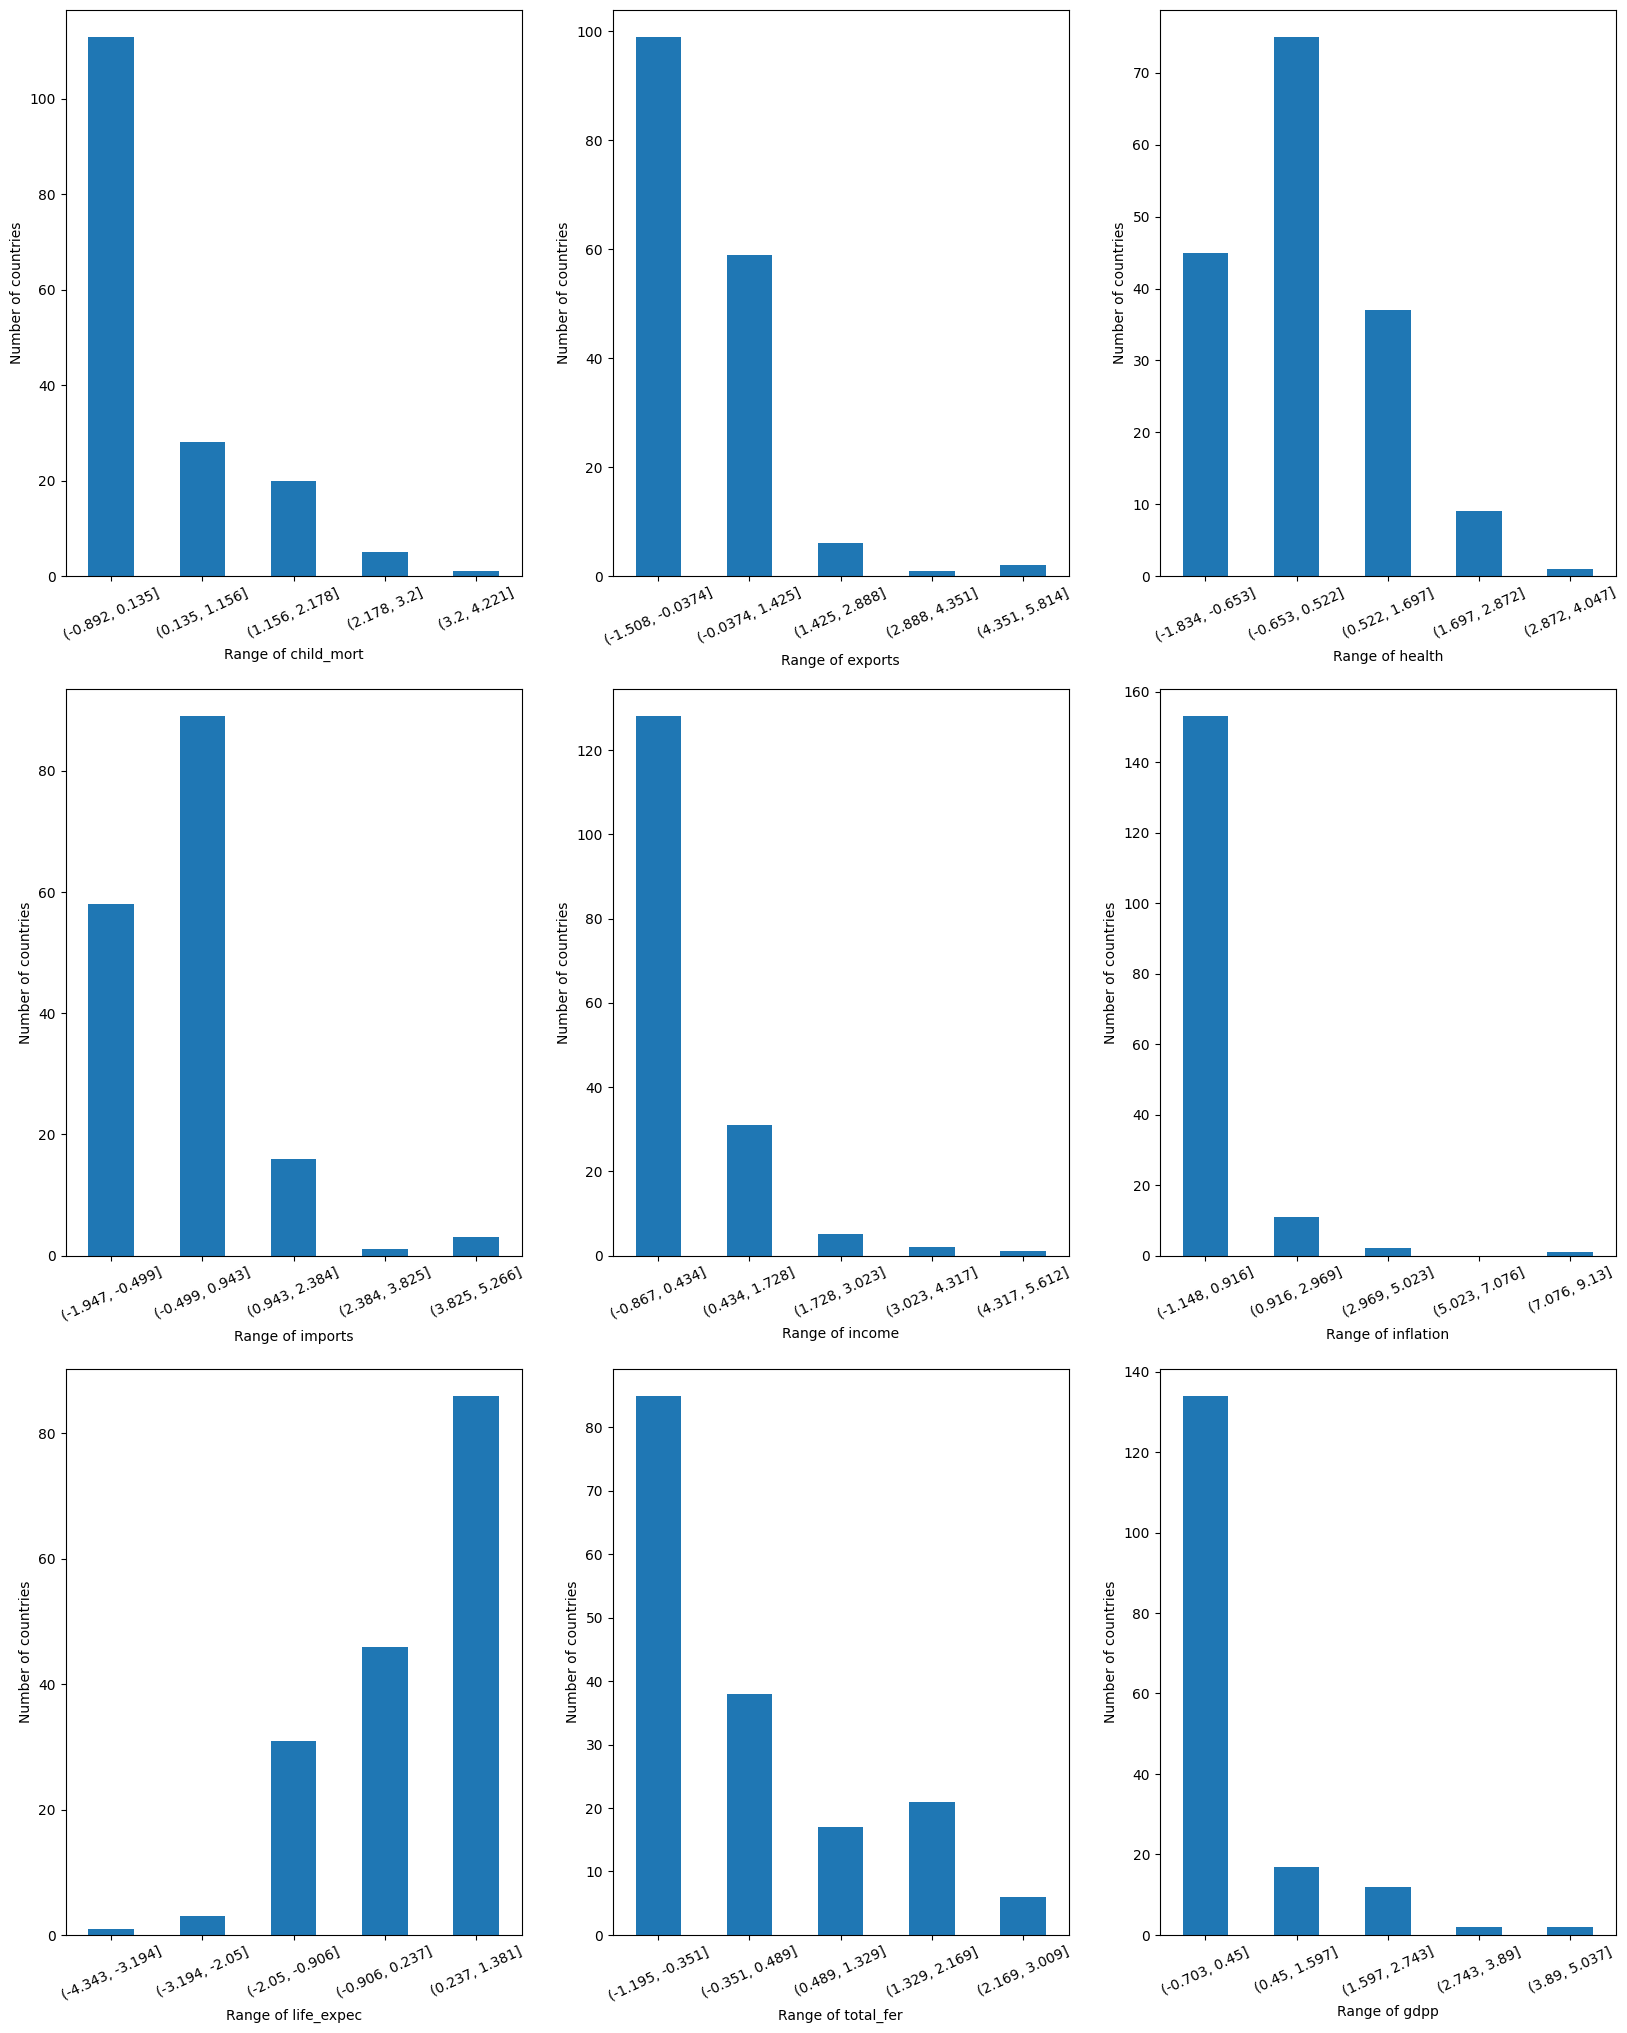

In [47]:
fig = plt.figure(figsize = (20,25))
cnt = 0
for i in X_scale.columns[0:10]:
    temp = pd.cut(x = X_scale[i],bins = 5)
    bin_counts = temp.value_counts().sort_index()
    cnt += 1
    ax = fig.add_subplot(3,3,cnt)
    plt.xlabel("Range of " + i)
    plt.ylabel("Number of countries")
    bin_counts.plot(kind = 'bar',rot = 25)
plt.show()

## Selecting essential features using PCA

In [79]:
pca = PCA()
pca.fit(X_scale)

PCA()

In [80]:
expalined_variance_ratio=pca.explained_variance_ratio_

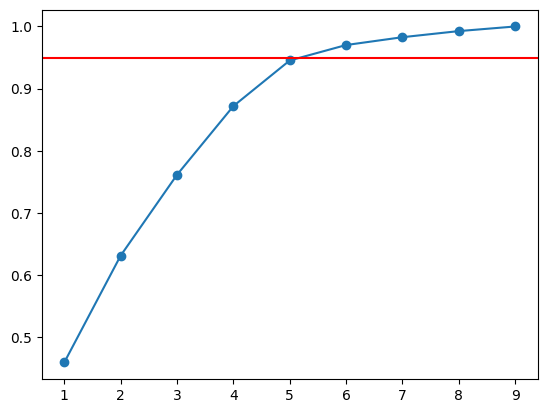

In [89]:
cumulative_variance_ratio=np.cumsum(expalined_variance_ratio)
plt.plot(np.arange(1,10),cumulative_variance_ratio,marker='o')
plt.axhline(y=0.95,color='r')

## Transforming Data

In [97]:
pca=PCA(n_components=5)
pca.fit(X_scale)
X_transform=pca.transform(X_scale)
X_transform=pd.DataFrame(X_transform,columns=["PC"+str(i) for i in np.arange(1,6)])
X_transform


,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


## Performing K_means clustering

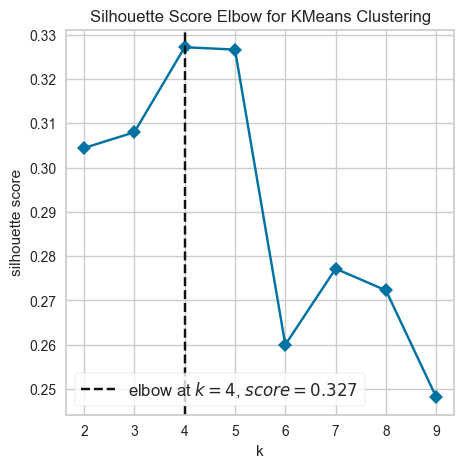

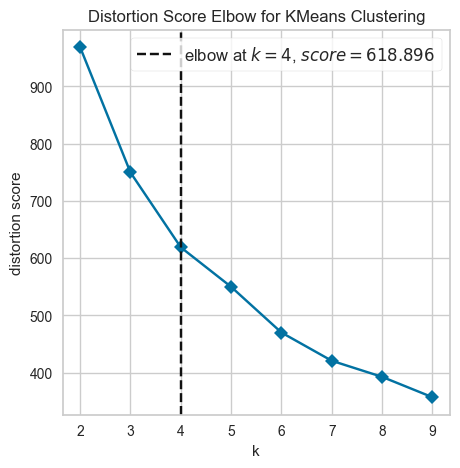

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
plt.rcParams['figure.figsize']=(5,5)
kmeans_clf = KMeans()

# plt.subplot(1,2,1)
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),metric='silhouette',timings=False)
visualizer.fit(X_transform)
visualizer.show()

# plt.subplot(1,2,2)
visualizer = KElbowVisualizer(kmeans_clf, k=(2,10),timings=False)
visualizer.fit(X_transform)
visualizer.show()

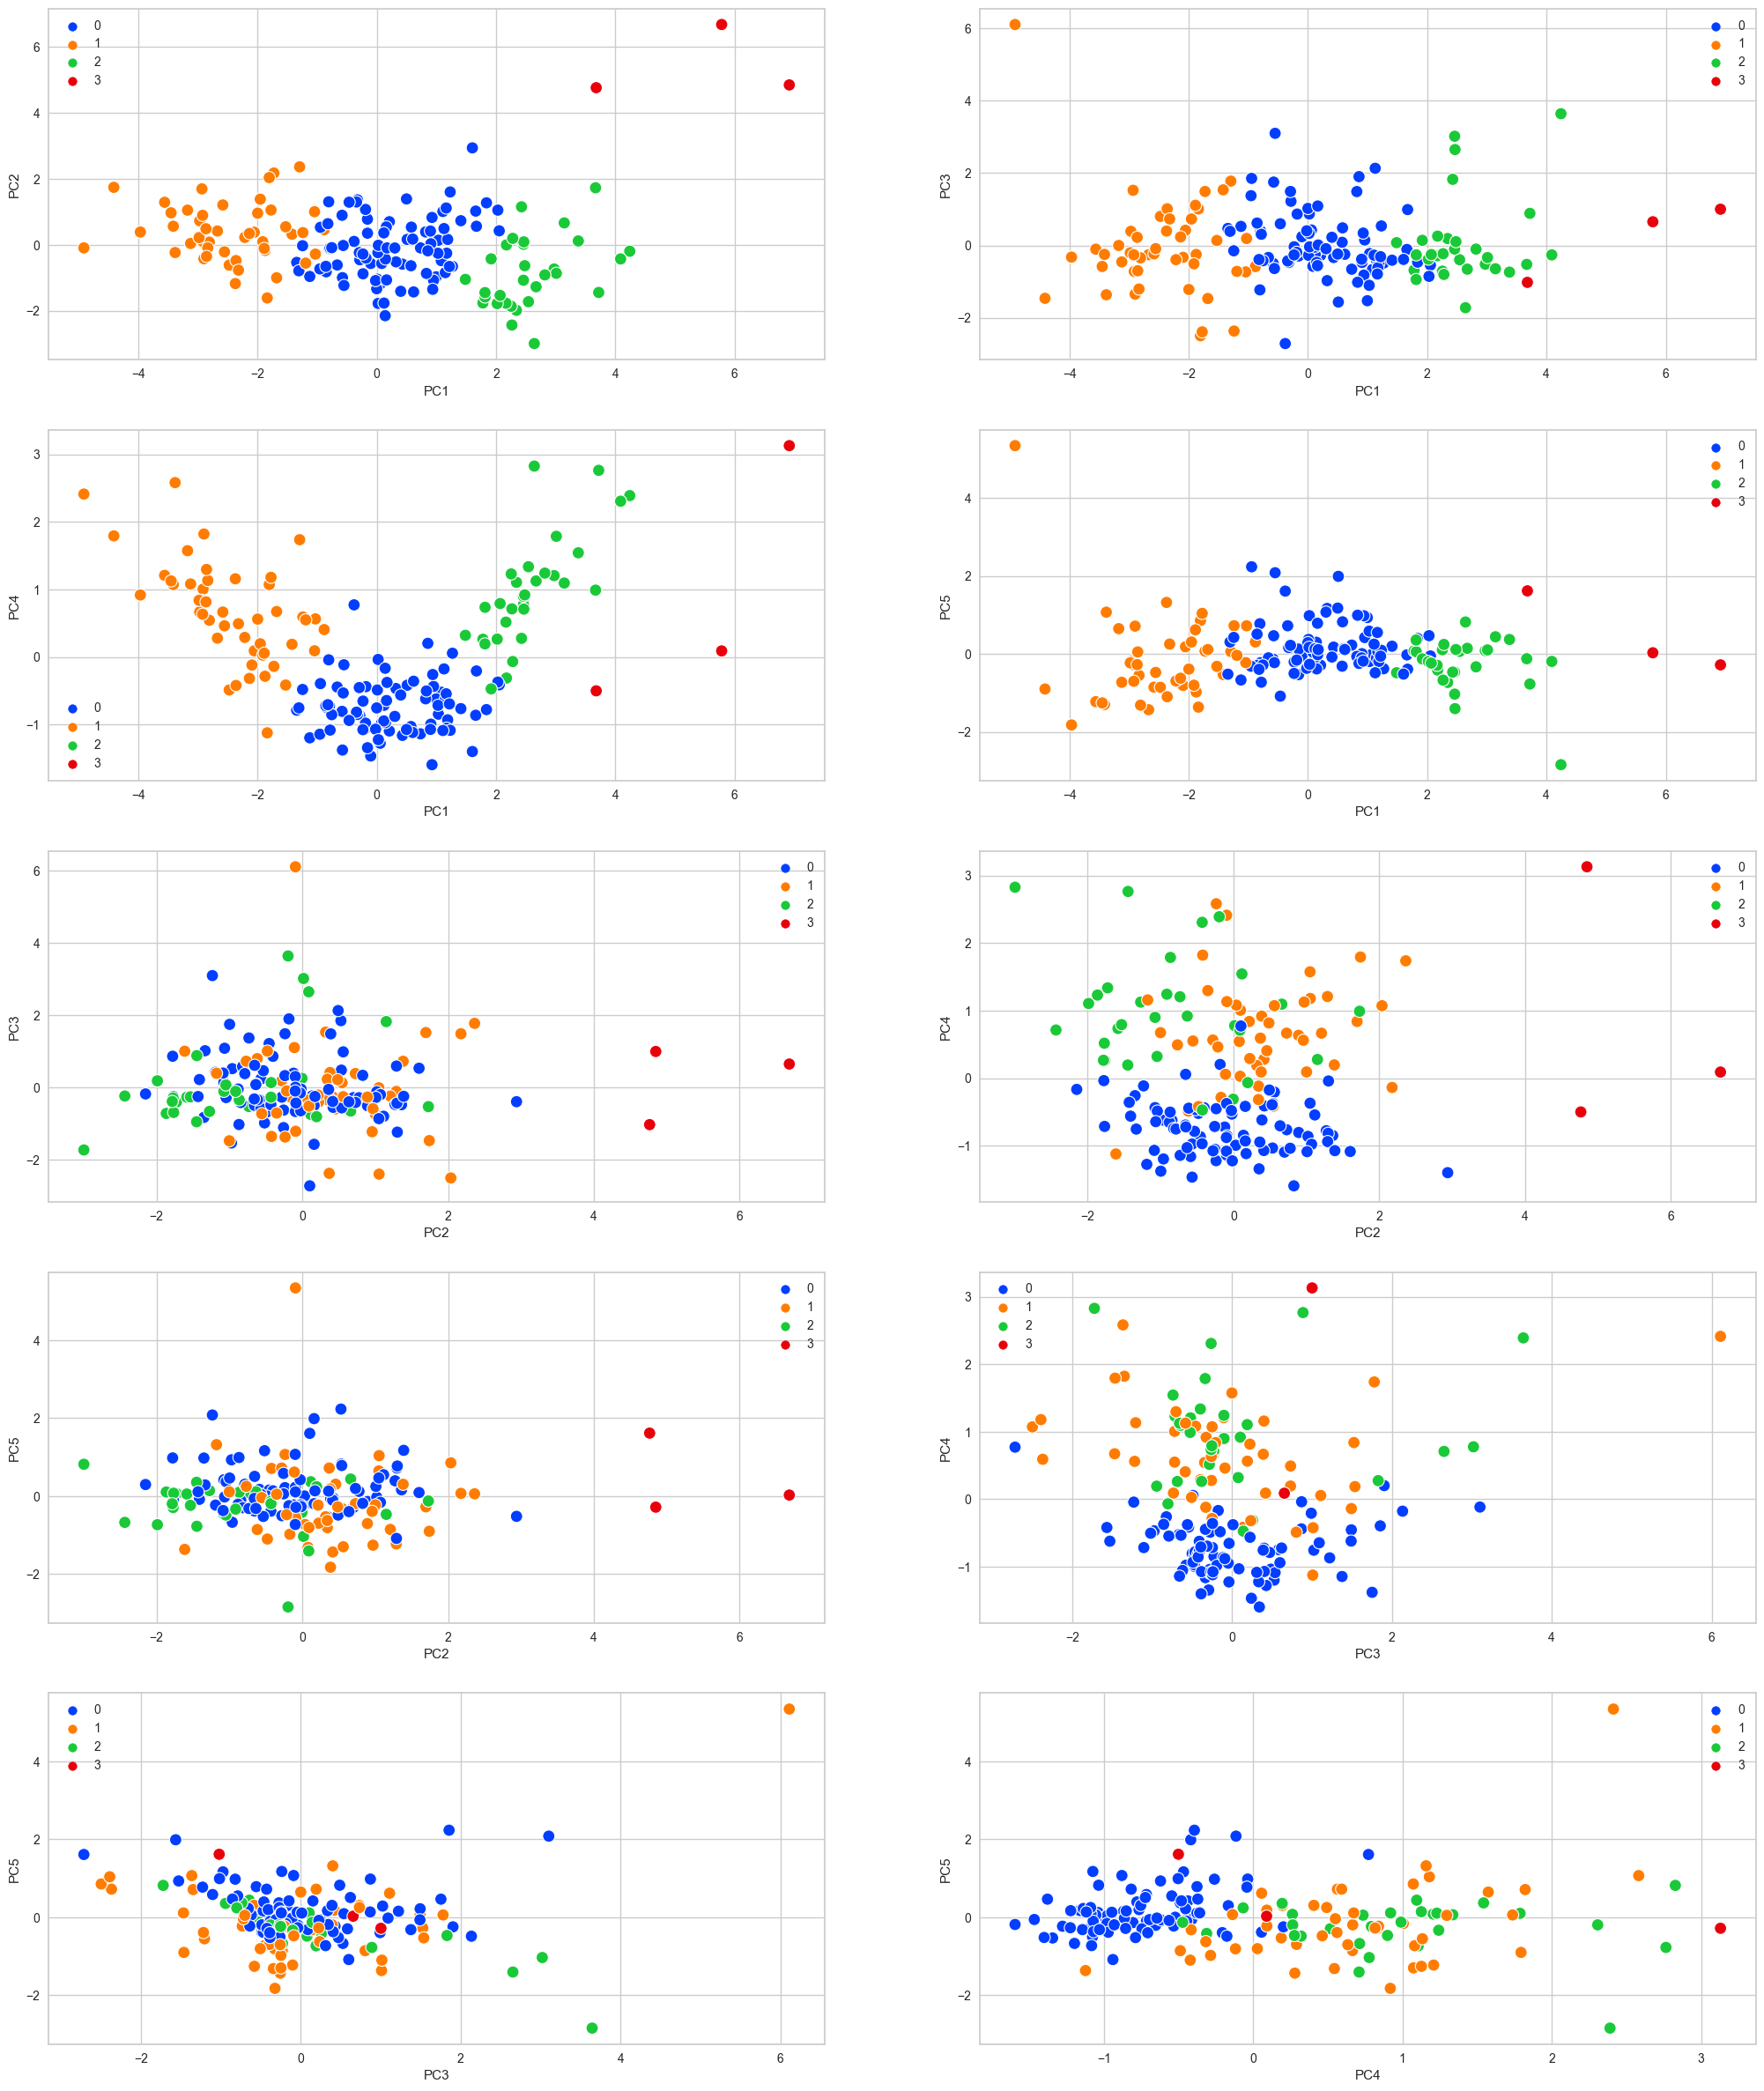

In [131]:
models_kmeans = KMeans(n_clusters = 4)
clusters = models_kmeans.fit_predict(X_transform)
fig = plt.figure(figsize =(25, 30))
cnt = 0
cols = X_transform.columns
for j in range(len(cols)):
  for k in range(j,len(cols)):
    if(j == k):
      continue
    else:
      cnt += 1
      ax = fig.add_subplot(5, 2, cnt)
      sns.scatterplot(x = X_transform[cols[j]], y = X_transform[cols[k]],hue = clusters,palette='bright',ax= ax,s = 100)
      ax.set_xlabel(cols[j])
      ax.set_ylabel(cols[k])
plt.show()

In [132]:
country_labels = models_kmeans.labels_
country_labels

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [133]:
X_transform["class"] = country_labels
X_transform

,PC1,PC2,PC3,PC4,PC5,class
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0
...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,1


In [157]:
unique_labels, counts = np.unique(country_labels, return_counts=True)
percentages = counts / len(country_labels) * 100

print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}\t{percentages[i]:.2f}%")
print("")

# print("Percentages:")
# for i, label in enumerate(unique_labels):
#     print(f"Class {label}: {percentages[i]:.2f}%")

Value counts:
Class 0: 86	51.50%
Class 1: 48	28.74%
Class 2: 30	17.96%
Class 3: 3	1.80%

